In [38]:
from sentence_transformers import SentenceTransformer
from sklearn.datasets import fetch_20newsgroups
import umap
import umap.plot
import numpy as np
import torch

# umap raises a bunch of warnings because dask (one of its dependencies) has 
# made some breaking changes at the beginning of 2025

In this notebook I'll use `sentence_transformers` to embed the messages from the 20 newsgroup dataset, and visualize them using UMAP. I'll also show how to use cosine similarity to find the messages closest to a given query: using transformer based sentence embedding should show the effect of semantic disambiguation.

I'll use only a subset of the groups so to not clutter the visualization with too many colors.

If you run this notebook make sure to use the GPU, otherwise computing the embedding may be too slow.

In [28]:
remove = ('headers','quotes')

# use only messages from the cryptography and medicine boards
cats = ( 'sci.crypt',
 'sci.electronics',
 'comp.os.ms-windows.misc',
 'rec.motorcycles',
 'misc.forsale',
 'rec.sport.hockey',
 'sci.med',
 'sci.space',)

newsgroups = fetch_20newsgroups(remove=remove,categories=cats)

In [29]:
model = SentenceTransformer("all-mpnet-base-v2")

In [30]:
# Calculate embeddings 
embeddings = model.encode(newsgroups.data)


To visualize the embeddings, we use UMAP. 

In [31]:
mapper = umap.UMAP().fit(embeddings)

/home/matteo/Documents/projects/nlplanet/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Make an array with the newsgroup each message comes from, which is nice for visualization

In [32]:
categories_dict = {i:name for i,name in enumerate(newsgroups.target_names)}
readable_labels = np.array([categories_dict[label] for label in newsgroups.target])

As expected, the posts from the same newsgroup end up close to each other, with the medicine posts forming a cluster by themselves, further apart from electronics, cryptography, and space. 

The nice thing about sentence transformers is that sentences of any length all end up represented with a vector of the same dimension, and transformer-based methods are context aware, which takes care of semantic disambiguation.

<Axes: >

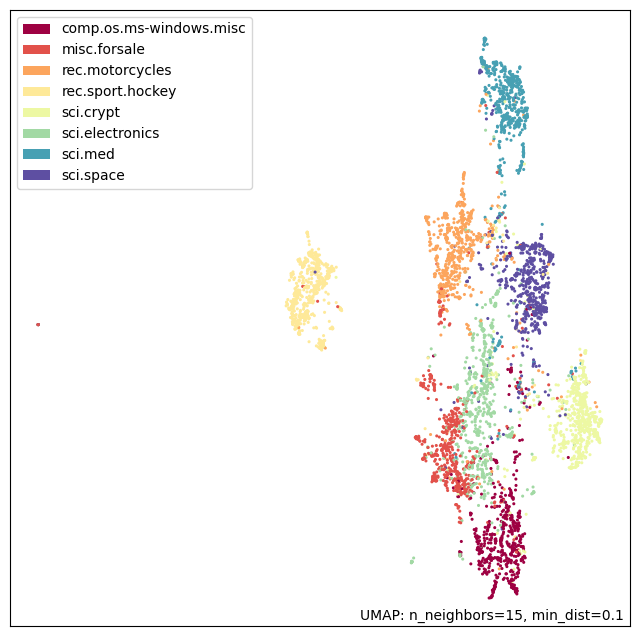

In [33]:
umap.plot.points(mapper,labels=readable_labels)

# Search via cosine similarity

In [35]:
query = ['cat']
query_emb = model.encode(query)

In [36]:
similarities = model.similarity(query_emb, embeddings)

In [ ]:
_,top_idxs = torch.topk(similarities,k=5)

Compare these results to what we got from the TF-IDF approach: the reference to the Linux command `cat` is not in the top-5 most relevant document, and all the retrieved messages are now about the domestic felines. 

In [49]:
for idx in reversed(top_idxs.flatten()):
    print("Similarity: ",similarities.flatten()[idx])
    print("Group: ",readable_labels[idx])
    print("Sample:")
    print(newsgroups.data[idx][:500],end='\n\n')

Similarity:  tensor(0.3054)
Group:  rec.sport.hockey
Sample:

It would seem logical that the mask is Potvins. His nickname is "The Cat", 
which would go a long ways towards explaining the panther. 

Of course, it could be an old story and the mask is Fuhrs, too.....

								Alan



Similarity:  tensor(0.3288)
Group:  rec.motorcycles
Sample:

Animal Rights people have been know to do that to other
"Bike riding dogs.cats and Racoons.  

-- 
##########################################################
There are only two types of ships in the NAVY; SUBMARINES 
                 and TARGETS !!!
#1/XS1100LH	DoD #956   #2 Next raise
Richard Pierson E06584 vnet: [908] 699-6063
Internet: fist@iscp.bellcore.com,|| UUNET:uunet!bcr!fist  
#include <std.disclaimer> My opinions are my own!!!
I Don't shop in malls, I BUY my jeans, jackets and ammo
i

Similarity:  tensor(0.3361)
Group:  misc.forsale
Sample:
For Sale:

1982 - 16' Hobie Cat Special, very good condition with
trailer, catbox, righting syste